In [10]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.transforms.functional import gaussian_blur
from torchvision.io import read_image, ImageReadMode

def load_mask(mask_path, device, gaussian_sigma=5):
    """
    Load and preprocess the mask with Gaussian blurring to slightly enlarge the mask.
    
    Args:
    - mask_path (str): Path to the mask image.
    - device (torch.device): Device to load the mask onto.
    - gaussian_sigma (int): Standard deviation for the Gaussian kernel.
    
    Returns:
    - original_mask (torch.Tensor): Original binary mask tensor.
    - blurred_mask (torch.Tensor): Blurred binary mask tensor.
    """
    # Load the mask image
    mask = read_image(mask_path, mode=ImageReadMode.GRAY)
    mask = mask.unsqueeze_(0).float() / 255.  # Normalize to 0 or 1

    # Resize the mask to the desired size
    mask = F.interpolate(mask, (512, 512))

    # Store the original mask for visualization
    original_mask = mask.clone()

    # Apply Gaussian blur to slightly enlarge the mask
    mask = gaussian_blur(mask, kernel_size=(gaussian_sigma, gaussian_sigma))

    # Threshold the blurred mask to create a binary mask
    mask[mask < 0.1] = 0
    mask[mask >= 0.1] = 1

    # Convert mask to the desired type and move to the device
    mask = mask.to(torch.float16).to(device)
    original_mask = original_mask.to(torch.float16).to(device)
    
    return original_mask, mask

def visualize_masks(original_mask, blurred_mask):
    """
    Visualize the original and blurred masks.
    
    Args:
    - original_mask (torch.Tensor): Original binary mask tensor.
    - blurred_mask (torch.Tensor): Blurred binary mask tensor.
    """
    # Convert masks to CPU and detach for visualization
    original_mask = original_mask.squeeze().cpu().detach().numpy()
    blurred_mask = blurred_mask.squeeze().cpu().detach().numpy()

    # Plot original and blurred masks
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    ax[0].imshow(original_mask, cmap='gray')
    ax[0].set_title('Original Mask')
    ax[0].axis('off')
    
    ax[1].imshow(blurred_mask, cmap='gray')
    ax[1].set_title('Blurred Mask')
    ax[1].axis('off')
    
    plt.show()

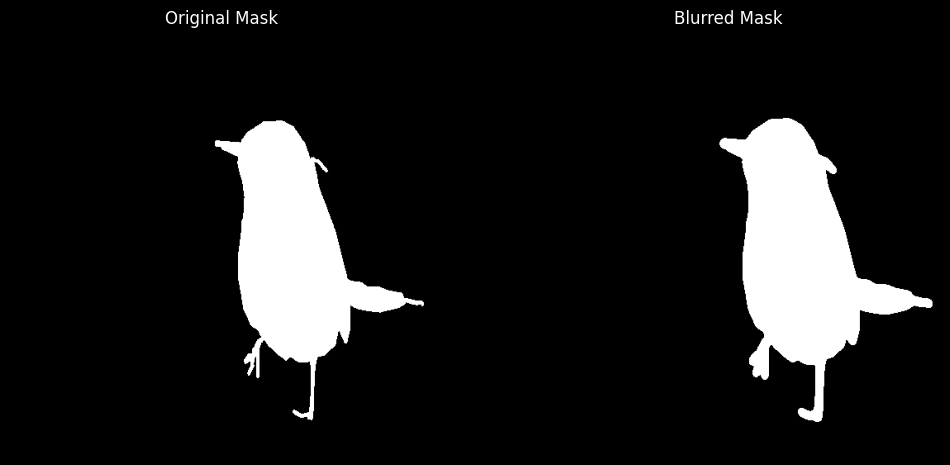

In [11]:
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mask_path = '/hy-tmp/DATA/test_sampled/00e549dae08777d3_mask_m0h23m.png'  # Replace with your mask image path
original_mask, blurred_mask = load_mask(mask_path, device, gaussian_sigma=13)
visualize_masks(original_mask, blurred_mask)

In [1]:
import sys
#添加上级目录
sys.path.append("..//")
from evaluation.data import InpaintingDataset
from omegaconf import OmegaConf
import os

In [6]:

config = OmegaConf.load("/hy-tmp/MyREMOVAL/configs/predict.yaml")
if not config.dataset.datadir.endswith('/'):
    config.dataset.datadir += '/'
dataset = InpaintingDataset(**config.dataset)


In [7]:
dataset.mask_filenames[0]

'/hy-tmp/DATA/test_sampled/0017d9757c6f4793_m01xyhv_72f59049_mask.png'

In [8]:
dataset.img_filenames[0]

'/hy-tmp/DATA/test_sampled/0017d9757c6f4793_m01xyhv_72f59049.jpg'

In [12]:
mask_fname=dataset.img_filenames[0]
cur_out_fname = os.path.join(
        config.outdir, 
        os.path.splitext(mask_fname[len(config.dataset.datadir):])[0] + "_removed" + ".png" # indir=$(pwd)/LaMa_test_images 
                                                                                # mask_fname[len(predict_config.indir):] 这段代码是用于从 mask_fname 中删除 predict_config.indir
    )
cur_out_fname

'/hy-tmp/outputs/0019ac4eb659f57e_removed.png'

In [2]:
from torchvision.io import read_image

In [3]:
image = read_image("/hy-tmp/DATA/test_sampled/0019ac4eb659f57e.jpg")

In [4]:
image.shape

torch.Size([3, 769, 1024])

In [1]:
import torch
lst = [i for i in range(50)]
lst_tensor = torch.tensor(lst)
lst_tensor

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [2]:
torch.exp(- 7*torch.sqrt(torch.tensor(2)) / (2 * 5 ** 2))

tensor(0.8204)

In [11]:
torch.exp(torch.tensor(- 7 / (2 * 7 ** 2)))

tensor(0.9311)

In [4]:
weight = []
for i in lst_tensor:
    weight.append(torch.exp(- i / (2 * 7 ** 2)))
weight

[tensor(1.),
 tensor(0.9898),
 tensor(0.9798),
 tensor(0.9699),
 tensor(0.9600),
 tensor(0.9503),
 tensor(0.9406),
 tensor(0.9311),
 tensor(0.9216),
 tensor(0.9123),
 tensor(0.9030),
 tensor(0.8938),
 tensor(0.8848),
 tensor(0.8758),
 tensor(0.8669),
 tensor(0.8581),
 tensor(0.8494),
 tensor(0.8407),
 tensor(0.8322),
 tensor(0.8238),
 tensor(0.8154),
 tensor(0.8071),
 tensor(0.7989),
 tensor(0.7908),
 tensor(0.7828),
 tensor(0.7748),
 tensor(0.7670),
 tensor(0.7592),
 tensor(0.7515),
 tensor(0.7438),
 tensor(0.7363),
 tensor(0.7288),
 tensor(0.7214),
 tensor(0.7141),
 tensor(0.7068),
 tensor(0.6997),
 tensor(0.6926),
 tensor(0.6855),
 tensor(0.6786),
 tensor(0.6717),
 tensor(0.6649),
 tensor(0.6581),
 tensor(0.6514),
 tensor(0.6448),
 tensor(0.6383),
 tensor(0.6318),
 tensor(0.6254),
 tensor(0.6190),
 tensor(0.6128),
 tensor(0.6065)]

In [9]:
txt_file_path = '/hy-tmp/DATA/test_random_files.txt'
with open(txt_file_path, 'r') as file:
    mask_paths = [line.strip() for line in file.readlines()]

In [12]:
mask_paths[0].rsplit('/', 1)[1]

'1cb487b0afb31ab6_m0bt9lr_20277897.png'

In [1]:
import os
import shutil

# 定义文件夹路径
testdata_dir = '/hy-tmp/DATA/test_sample0'
inp_outputs_dir = '/hy-tmp/outputs'
missing_files_dir = '/hy-tmp/inp_miss'

In [10]:
testdata_files = os.listdir(testdata_dir)[1]
testdata_files.rsplit('_',1)[0]

'0017d9757c6f4793_m01xyhv_72f59049'

In [1]:
import json
test_scene="/hy-tmp/inst-inpaint/test_scenes.json"
with open(test_scene) as fp:
    test_scene = json.load(fp)

In [2]:
test_scene

{'1011': {'objects': {'1540968': {'name': 'man',
    'attributes': [],
    'bidirected': True,
    'relations': [{'object': '1638047', 'name': 'to the right of'}],
    'bbox': [372, 142, 431, 332]},
   '1638045': {'name': 'building',
    'attributes': ['rock'],
    'bidirected': False,
    'relations': [],
    'bbox': [1, 0, 501, 346]},
   '1638046': {'name': 'wall',
    'attributes': [],
    'bidirected': False,
    'relations': [{'object': '1638045', 'name': 'on the side of'}],
    'bbox': [0, 0, 500, 285]},
   '1638047': {'name': 'man',
    'attributes': [],
    'bidirected': True,
    'relations': [{'object': '1540968', 'name': 'to the left of'}],
    'bbox': [218, 162, 281, 303]}},
  'image_relative_positions': {'1540968': 'to the right',
   '1638045': 'to the center',
   '1638046': 'to the center',
   '1638047': 'to the center'},
  'height': 346,
  'width': 500},
 '1021': {'objects': {'1030923': {'name': 'man',
    'attributes': [],
    'bidirected': True,
    'relations': [{'obj

In [ ]:
import csv

def read_txt_to_dict(file_path):
    data_dict = {}
    
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter='\t')
        header = next(reader)  # Skip header if there is one
        for row in reader:
            id = row[0].rsplit('.', 1)[0]
            LabelName = row[1]
            BoxXMin = float(row[2])
            BoxXMax = float(row[3])
            BoxYMin = float(row[4])
            BoxYMax = float(row[5])
            
            data_dict[id] = {
                'LabelName': LabelName,
                'BoxXMin': BoxXMin,
                'BoxXMax': BoxXMax,
                'BoxYMin': BoxYMin,
                'BoxYMax': BoxYMax
            }
            
    return data_dict